# Question solved : How does the annual salary of buyers impact the purchase of the most frequently bought car brands?

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt 

# Loading and transforming data
df = pd.read_csv('/Users/abay/Downloads/Car Sales.xlsx - car_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


**1) Dividing the annual income columb into 5 different groups by creating the new column : 'Income groups'. First of all, we need find the max annual income and then based on it create the 5 groups of customers annual income : 0-20 % , 21-40 %, 41-60%, 61-80% , 81-100% from the max value.**

In [48]:
# finding the max annual income 
df['Annual Income'].max() # 11,200,000

# creating the new column using cut function 
df['income_group'] = pd.cut(df['Annual Income'], 
                            bins=[0, 2240000, 4480000, 6720000, 8960000, 11200000], 
                            labels=['0-2,240,000', '2,240,001-4,480,000', '4,480,001-6,720,000', '6,720,001-8,960,000', '8,960,001-11,200,000'])

df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,income_group
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,"0-2,240,000"
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,"0-2,240,000"
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,"0-2,240,000"
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,"0-2,240,000"
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,"0-2,240,000"


**2) Finding the most purchased cars brends**

In [92]:
df['Company'].value_counts().head(7)

Company
Chevrolet     1819
Dodge         1671
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Name: count, dtype: int64

In [94]:
# Filter the DataFrame to include only the top 7 brands in the list
filtered_df = df[df['Company'].isin(['Chevrolet', 'Dodge', 'Ford', 'Volkswagen', 'Mercedes-B', 'Mitsubishi', 'Chrysler'])]

# Creating the pivot table
df_pv = filtered_df.pivot_table(
    index='income_group',
    columns='Company',
    values='Price ($)',
    aggfunc='size'
)

df_pv


/var/folders/vw/42wt165574b7245nzwcs1t4w0000gn/T/ipykernel_15497/2237821766.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pv = filtered_df.pivot_table(


Company,Chevrolet,Chrysler,Dodge,Ford,Mercedes-B,Mitsubishi,Volkswagen
income_group,,,,,,,
"0-2,240,000",1762,1068,1599,1551,1233,1220,1266
"2,240,001-4,480,000",55,48,69,58,47,55,63
"4,480,001-6,720,000",2,4,3,5,4,2,4
"6,720,001-8,960,000",0,0,0,0,1,0,0
"8,960,001-11,200,000",0,0,0,0,0,0,0


**Plotting the grouping results**


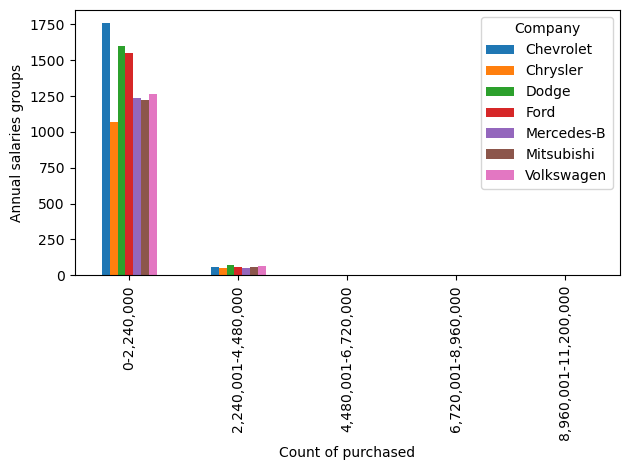

In [100]:
df_pv.plot(kind='bar')

plt.xlabel('Count of purchased')
plt.ylabel('Annual salaries groups')

plt.tight_layout()
plt.show()


***Conclusion : The data reveals a strong preference for Chevrolet, Chrysler, Dodge, Ford, Mercedes-Benz, Mitsubishi, and Volkswagen cars among buyers in the lowest income group (0-2,240,000), with significant numbers across all brands. As the income group increases, the number of purchases sharply declines, with minimal to no purchases observed in the higher income groups (6,720,001-11,200,000). This suggests that these brands are predominantly popular among lower-income buyers, with very limited appeal to higher-income individuals.***